Simulation autosomes with (fake) readcount data. Just a trial run to establish pipeline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os as os
import sys as sys
import multiprocessing as mp

print(f"CPU Count: {mp.cpu_count()}")
sys.path.insert(0, "/mnt/archgen/users/yilei/tools/hapROH/create1000G_Mosaic")
from createMosaicsMulti import Mosaic_1000G_Multi
from createMosaicsMulti import create_individual_mosaic

path = "/mnt/archgen/users/yilei/tools/hapROH"   # The Path on Yilei's remote space
os.chdir(path)  # Set the right Path (in line with Atom default)
print(f"Set path to: {os.getcwd()}") # Show the current working directory.

CPU Count: 40
Set path to: /mnt/archgen/users/yilei/tools/hapROH


In [4]:
# actual simulation
#### Create the parameters array for the starmap:
base_path="./simulated/1000G_Mosaic/TSI/Autosome/" 
path1000G="/mnt/archgen/users/yilei/Data/1000G/1000g1240khdf5/all1240/chr"
pop_list=["TSI"] 
n=1   # Number of Individuals
ch=5
chunk_length=0.0025
l = 8  # length of simulated ROH, in centiMorgen
n_blocks=3 # How many blocks will be copied in

# parameters for faking readcount data
cov = 0.5
con = 0.15
err_rate=1e-3


create_individual_mosaic(base_path, path1000G, pop_list, n, ch, chunk_length, l, n_blocks, cov, con, err_rate)

In [2]:
sys.path.insert(0, "/mnt/archgen/users/yilei/tools/hapROH/package")  # hack to get local package first in path [FROM HARALD - DELETE!!!]

from hapsburg.PackagesSupport.hapsburg_run import hapCon_chrom  # Need this import
from hapsburg.PackagesSupport.hapsburg_run import hapsb_chrom  # Need this import

In [6]:
hapsb_chrom("iid0", ch=5, save=True, save_fp=False, n_ref=2504, diploid_ref=True, exclude_pops=[], 
                e_model="readcount", p_model="SardHDF5", readcounts=True, random_allele=False,
                post_model="Standard", path_targets = "./simulated/1000G_Mosaic/TSI/Autosome/data.h5",
                h5_path1000g = "/mnt/archgen/users/yilei/Data/1000G/1000g1240khdf5/all1240/chr", 
                meta_path_ref = "/mnt/archgen/users/yilei/Data/1000G/meta_df_all.csv",
                folder_out="./simulated/1000G_Mosaic/TSI/Autosome/", prefix_out="",
                c=0.0, roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0,
                max_gap=0, cutoff_post = 0.999, roh_min_l = 0.01, logfile=True)

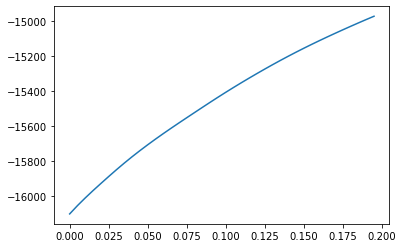

In [4]:

cons = np.arange(0, 0.2, 0.005)

lls, conMLE, low95, high95 = hapCon_chrom("iid0", 1, save=True, save_fp=False, n_ref=2504, diploid_ref=True, 
    exclude_pops=['TSI'], conPop=[], e_model="readcount_contam", 
    p_model="SardHDF5", readcounts=True, random_allele=False,
    post_model="Standard", path_targets = "./simulated/1000G_Mosaic/TSI/Autosome/data.h5",
    h5_path1000g = "/mnt/archgen/users/yilei/Data/1000G/1000g1240khdf5/all1240/chr", 
    meta_path_ref = "/mnt/archgen/users/yilei/Data/1000G/meta_df_all.csv",
    folder_out="./simulated/1000G_Mosaic/TSI/Autosome/", prefix_out="",
    c=cons, roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0,
    max_gap=0, cutoff_post = 0.999, roh_min_l = 0.01, logfile=True)

print(f'estimated contamination by MLE: {conMLE}({low95} - {high95})')

import matplotlib.pyplot as plt
plt.plot(cons, lls)


First, run simulated samples as target in hapROH without assuming contamination 

In [2]:
sys.path.insert(0, "/mnt/archgen/users/yilei/tools/hapROH/package")  # hack to get local package first in path [FROM HARALD - DELETE!!!]
from hapsburg.PackagesSupport.hapsburg_run import hapsb_ind  # Need this import

In [5]:
# readcount mode
for i in range(5):
    hapsb_ind(iid=f"iid{i}", chs=range(3,4), 
          path_targets='./simulated/1000G_Mosaic/TSI/chr3_5cM/data.h5',
          h5_path1000g='../..//Data/1000G/1000g1240khdf5/all1240/chr',
          meta_path_ref='../../Data/1000G/meta_df_all.csv', 
          folder_out='./simulated/1000G_Mosaic/TSI/chr3_5cM', prefix_out='rc', 
          e_model='readcount', p_model='SardHDF5', 
          post_model='Standard', processes=1, delete=False, output=True, save=True, 
          save_fp=False, n_ref=2504, exclude_pops=[], readcounts=True, random_allele=False, 
          roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0, 
          cutoff_post=0.999, max_gap=0, roh_min_l=0.01, 
          logfile=False, combine=False, file_result='_roh_full.csv')

In [6]:
# diploid mode
for i in range(5):
    hapsb_ind(iid=f"iid{i}", chs=range(3,4), 
          path_targets='./simulated/1000G_Mosaic/TSI/chr3_5cM/data.h5',
          h5_path1000g='../..//Data/1000G/1000g1240khdf5/all1240/chr',
          meta_path_ref='../../Data/1000G/meta_df_all.csv', 
          folder_out='./simulated/1000G_Mosaic/TSI/chr3_5cM', prefix_out='dip', 
          e_model='diploid_gt', p_model='SardHDF5', 
          post_model='Standard', processes=1, delete=False, output=True, save=True, 
          save_fp=False, n_ref=2504, exclude_pops=[], readcounts=False, random_allele=False, 
          roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0, 
          cutoff_post=0.999, max_gap=0, roh_min_l=0.01, 
          logfile=False, combine=False, file_result='_roh_full.csv')

In [7]:
# haploid mode
for i in range(5):
    hapsb_ind(iid=f"iid{i}", chs=range(3,4), 
          path_targets='./simulated/1000G_Mosaic/TSI/chr3_5cM/data.h5',
          h5_path1000g='../..//Data/1000G/1000g1240khdf5/all1240/chr',
          meta_path_ref='../../Data/1000G/meta_df_all.csv', 
          folder_out='./simulated/1000G_Mosaic/TSI/chr3_5cM', prefix_out='hap', 
          e_model='haploid', p_model='SardHDF5', 
          post_model='Standard', processes=1, delete=False, output=True, save=True, 
          save_fp=False, n_ref=2504, exclude_pops=[], readcounts=False, random_allele=True, 
          roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0, 
          cutoff_post=0.999, max_gap=0, roh_min_l=0.01, 
          logfile=False, combine=False, file_result='_roh_full.csv')

Now run hapROH with contamination

In [3]:
from hapsburg.PackagesSupport.hapsburg_run import hapCon_chrom

In [4]:
for i in range(5):
    hapCon_chrom(iid=f"iid{i}", ch=3, save=True, save_fp=False, n_ref=2504, diploid_ref=True, exclude_pops=[], 
                e_model="readcount_contam", p_model="SardHDF5", readcounts=True,random_allele=False, post_model="Standard", 
                path_targets='./simulated/1000G_Mosaic/TSI/chr3_5cM/data.h5',
          h5_path1000g='../..//Data/1000G/1000g1240khdf5/all1240/chr',
          meta_path_ref='../../Data/1000G/meta_df_all.csv', 
          folder_out='./simulated/1000G_Mosaic/TSI/chr3_5cM', prefix_out="rcCon",
                c=0.05, roh_in=1, roh_out=20, roh_jump=300, e_rate=0.01, e_rate_ref=0.0,
                max_gap=0, cutoff_post = 0.999, roh_min_l = 0.01, logfile=False)

Using Rescaled HMM.
Loaded Pre Processing Model: SardHDF5
Loading Individual: iid0

Loaded 77652 variants
Loaded 5 individuals
HDF5 loaded from ./simulated/1000G_Mosaic/TSI/chr3_5cM/data.h5

Loaded 77652 variants
Loaded 2504 individuals
HDF5 loaded from ../..//Data/1000G/1000g1240khdf5/all1240/chr3.hdf5

Intersection on Positions: 77652
Nr of Matching Refs: 77652 / 77652
Ref/Alt Allele Matching: 77652 / 77652
Flipped Ref/Alt Alleles for 0 SNPs
Together: 77652 / 77652
2504 / 2504 Individuals included in Reference
Extracting up to 2504 Individuals
Exctraction of hdf5 done. Subsetting...!
size of gts matrix: (2, 77652)
Extraction of 2 Haplotypes complete
Flipping Ref/Alt Allele in target for 0 SNPs...
Exctraction of hdf5 done. Subsetting...!
size of gts matrix: (5008, 77652)
Extraction of 5008 Haplotypes complete
Subset to markers with data: 48830 / 77652
Fraction SNPs covered: 0.6288
Successfully saved target individual data to: ./simulated/1000G_Mosaic/TSI/chr3_5cM/iid0/chr3/rcCon
Loadi